In [70]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline

In [51]:
diabetesData = fetch_ucirepo(id=296)

/opt/homebrew/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [53]:
data = diabetesData.data.features 
y = diabetesData.data.targets
data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes


# MDS

## Preprocessing

In [55]:
# Process Categoric Data
labelEncoder = LabelEncoder()
def labelToNumeric(attribute, df = data):
    df.loc.__setitem__((slice(None), (attribute)), labelEncoder.fit_transform(df[attribute]))

categories = data.select_dtypes(include='object').columns.tolist()
for category in categories:
    labelToNumeric(category)

data.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2,0,0,9,6,25,1,1,17,37,...,0,0,1,1,0,0,0,0,1,0
1,2,0,1,9,1,1,7,3,17,72,...,0,0,3,1,0,0,0,0,0,1
2,0,0,2,9,1,1,7,2,17,72,...,0,0,1,1,0,0,0,0,1,1
3,2,1,3,9,1,1,7,2,17,72,...,0,0,3,1,0,0,0,0,0,1
4,2,1,4,9,1,1,7,1,17,72,...,0,0,2,1,0,0,0,0,0,1


In [47]:
# MDS dauert zu lange
#mds = MDS(n_jobs=-1)
#scaled_data = mds.fit_transform(data)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,2,0,0,9,6,25,1,1,16,34,...,0,0,1,1,0,0,0,0,1,0
1,2,0,1,9,1,1,7,3,16,67,...,0,0,3,1,0,0,0,0,0,1
2,0,0,2,9,1,1,7,2,16,67,...,0,0,1,1,0,0,0,0,1,1
8,2,0,8,9,2,1,4,13,16,67,...,0,0,2,1,0,0,0,0,0,1
9,2,0,9,9,3,3,4,12,16,17,...,0,0,2,1,0,0,0,0,0,1


Leider kann ich MDS nicht durchführen, da der Kernel immer abbricht.

# PCA

## Prep

In [58]:
scaler = StandardScaler()
scaledData = scaler.fit_transform(data)

male, female = [x for _, x in data.groupby(data['gender'] == 0)]


## 2D

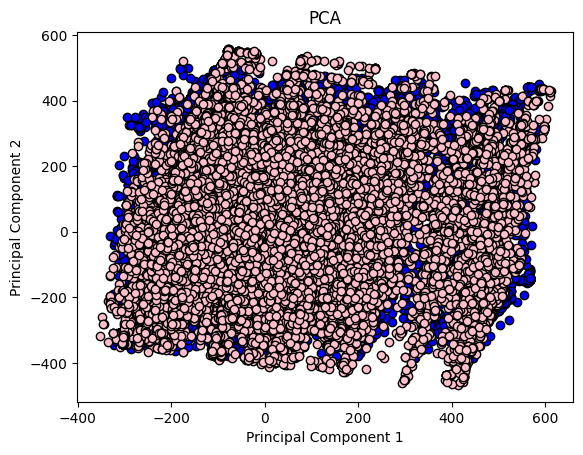

In [76]:
# PCA durchführen
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(scaledData)
pcF = pca.fit_transform(female)
pcM = pca.fit_transform(male)

# plt.scatter(principalComponents[:, 0], principalComponents[:, 1], edgecolor='k')
plt.scatter(pcM[:, 0], pcM[:, 1], c="blue", edgecolor='k')
plt.scatter(pcF[:, 0], pcF[:, 1], c="pink", edgecolor='k')


plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

> Die Daten sind sehr homogen und es gibt wenige Ausreißer.

## 3D

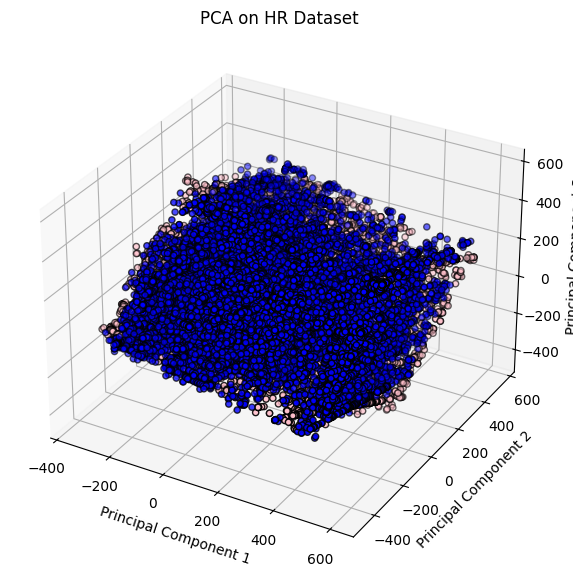

In [64]:
pca3D = PCA(n_components=3)
# pcaFeatures3D = pca3D.fit_transform(scaledData)
pcaFeatures3DF = pca3D.fit_transform(female)
pcaFeatures3DM = pca3D.fit_transform(male)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(pcaFeatures3DF[:, 0], pcaFeatures3DF[:, 1], pcaFeatures3DF[:, 2], color="pink", edgecolor='k')
ax.scatter3D(pcaFeatures3DM[:, 0], pcaFeatures3DM[:, 1], pcaFeatures3DM[:, 2], color="blue", edgecolor='k')
plt.title('PCA on HR Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

# t-SNE

/var/folders/1k/k31474cn5s915dzhqxj4f_bm0000gn/T/ipykernel_13244/1334835659.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsneData[:, 0], tsneData[:, 1], marker='o', cmap="viridis", alpha=0.5)


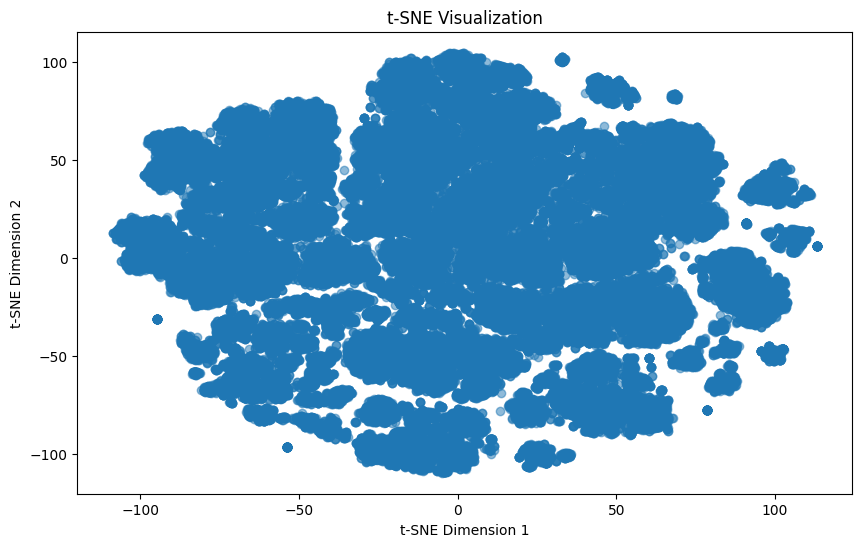

In [68]:
tsne = TSNE(n_components=2)
tsneData = tsne.fit_transform(scaledData)

# Visualisierung der t-SNE-Ergebnisse
plt.figure(figsize=(10, 6))
plt.scatter(tsneData[:, 0], tsneData[:, 1], marker='o', cmap="viridis", alpha=0.5)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

> man kann mehrere zusammenfassbare Datenmengen erkennen.